In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv('Titanic-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# Fill missing numerical values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing categorical values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop columns if too many missing values
df.drop(columns=['Cabin'], inplace=True)

C:\Users\srees\AppData\Local\Temp\ipykernel_5736\522141317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\srees\AppData\Local\Temp\ipykernel_5736\522141317.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Count'>

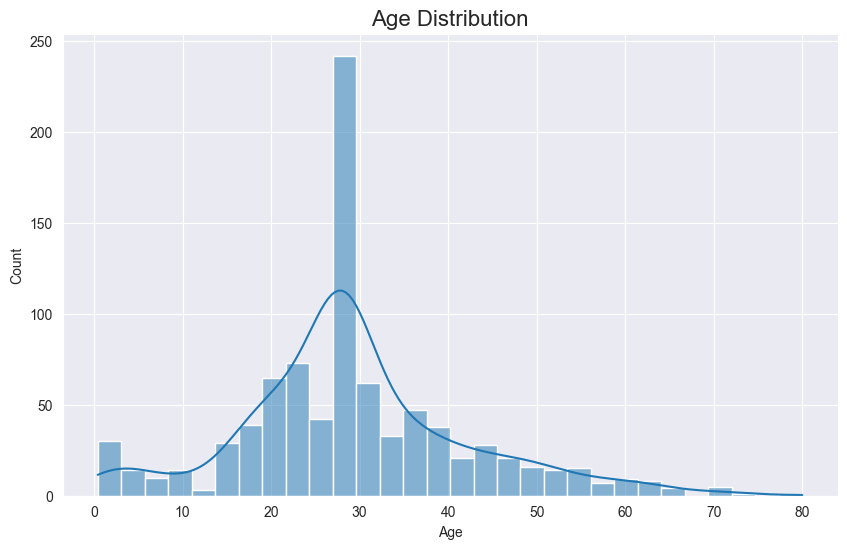

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.title("Age Distribution" , fontsize = 16)
sns.histplot(df , x="Age" , kde=True)

<Axes: title={'center': 'Age By Class'}, xlabel='Pclass', ylabel='Age'>

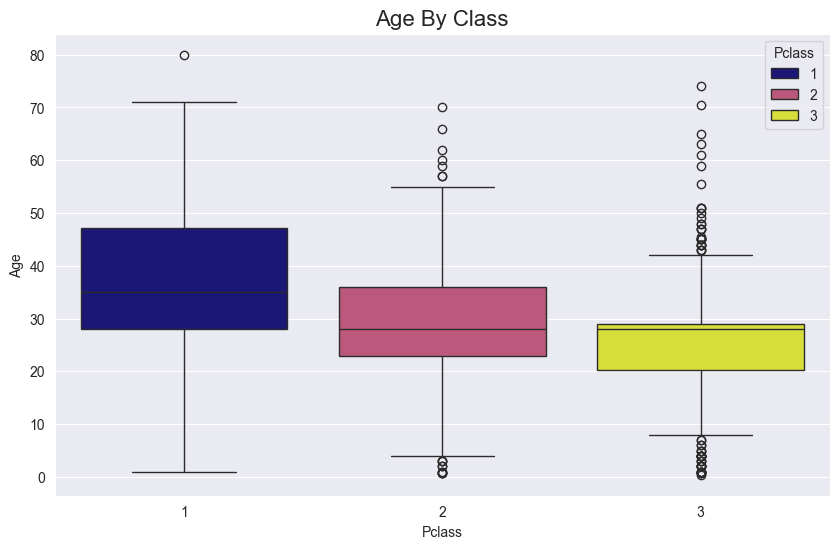

In [12]:
plt.figure(figsize=(10,6))
plt.title("Age By Class" , fontsize = 16)
sns.boxplot(x='Pclass', y='Age', data=df , hue= "Pclass" , palette= "plasma")

In [13]:
# Encode categorical features into numeric values

# 1) Binary encode 'Sex'
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# 2) One-hot encode 'Embarked' (drop original column after)
emb_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, emb_dummies], axis=1)
df.drop(columns=['Embarked'], inplace=True)

# 3) Extract a simple Title feature from Name, group rare titles, then label-encode
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
df['Title'] = df['Title'].apply(lambda x: 'Rare' if x in rare_titles else x)
title_map = {t:i for i,t in enumerate(sorted(df['Title'].unique()))}
df['Title'] = df['Title'].map(title_map)

# 4) Drop columns not useful for modeling
df.drop(columns=['Name','Ticket','Cabin'], inplace=True, errors='ignore')

# 5) Quick check
print(df[['Sex','Title'] + list(emb_dummies.columns)].head())
df.info()

   Sex  Title  Embarked_Q  Embarked_S
0    1      2       False        True
1    0      3       False       False
2    0      1       False        True
3    0      3       False        True
4    1      2       False        True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
 10  Title        891 non-null    int64  
dtypes: bool(2), float64(2), int64(7)
memory usage: 64.5 KB


In [14]:
from sklearn.preprocessing import StandardScaler

#numerical columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# quick check
print(df[num_cols].describe())

                Age          Fare         SibSp         Parch
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -5.657365e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.046374e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    4.333115e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.891554e+00  9.667167e+00  6.784163e+00  6.974147e+00


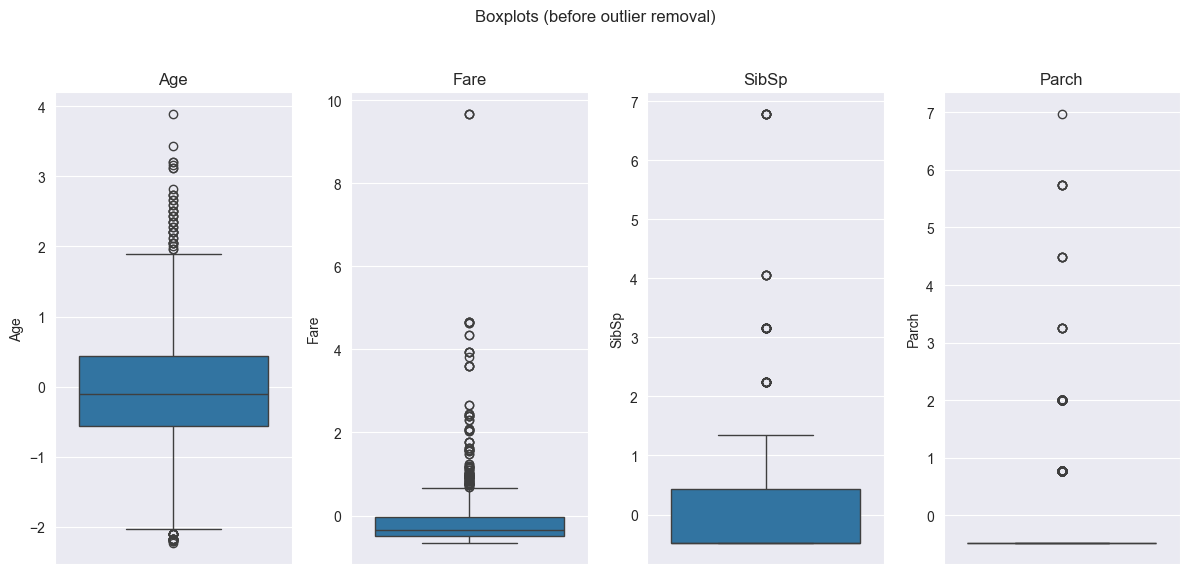

Age: 66 outliers (bounds: -2.064, 1.932)
Fare: 116 outliers (bounds: -1.187, 0.673)
SibSp: 46 outliers (bounds: -1.836, 1.794)
Parch: 213 outliers (bounds: -0.474, -0.474)
Total rows before removal: 891
Total rows after removal: 577  (removed 314)


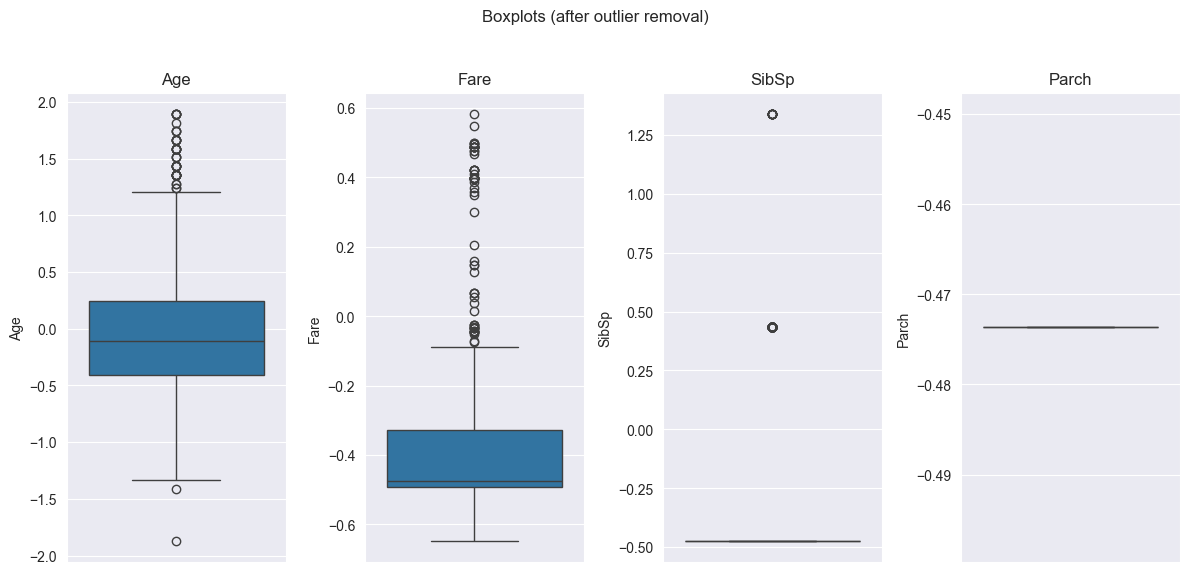

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Sex          577 non-null    int64  
 4   Age          577 non-null    float64
 5   SibSp        577 non-null    float64
 6   Parch        577 non-null    float64
 7   Fare         577 non-null    float64
 8   Embarked_Q   577 non-null    bool   
 9   Embarked_S   577 non-null    bool   
 10  Title        577 non-null    int64  
dtypes: bool(2), float64(4), int64(5)
memory usage: 41.8 KB


In [15]:
# 1) Boxplots before removal
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.suptitle("Boxplots (before outlier removal)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2) Compute IQR bounds and identify outliers per column
outlier_masks = {}
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outlier_masks[col] = ~df[col].between(lower, upper)
    print(f"{col}: {outlier_masks[col].sum()} outliers (bounds: {lower:.3f}, {upper:.3f})")

# 3) Remove rows that are outliers in any of the selected numeric columns
combined_outlier_mask = pd.concat(outlier_masks, axis=1).any(axis=1)
print(f"Total rows before removal: {df.shape[0]}")
df = df[~combined_outlier_mask].copy()
print(f"Total rows after removal: {df.shape[0]}  (removed {combined_outlier_mask.sum()})")

# 4) Boxplots after removal
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.suptitle("Boxplots (after outlier removal)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Quick check
df.reset_index(drop=True, inplace=True)
df.info()